# Test simple-nidaqmx

## 0. Import dependencies

In [1]:
import generate_output_signal as gen_output
import simple_nidaqmx as daq

import matplotlib.pyplot as plt

## 1. Generate an output signal

In [2]:
A = 5
freq = 48000
fs = 96000
numsample = 96
taper = 0.2
signal, timegrid = gen_output.monochromatic(A, freq, fs, numsample, taper)

## 2. Plot the output signal

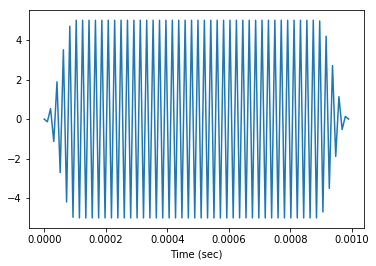

In [3]:
fig, ax = plt.subplots()
ax.plot(timegrid[0, :], signal[0, :])
ax.set_xlabel('Time (sec)');

## 3. Transmission and reception using nidaqmx
### - There is no input connection at ai0.
### - The transmitted signal is directly wired from ao0 to ai1 (second channel).

In [4]:
aolist = ['ao0']
ailist = ['ai0', 'ai1']
rangeval = [-10.0, 10.0]
savedirname = 'data/data1.npy'
daq.check_driver()
data = daq.momi(signal, fs, aolist, ailist, rangeval, savedirname)

DriverVersion(major_version=18, minor_version=1, update_version=0)
Device name: Dev1
Output channel: ['Dev1/ao0']
Input channel: ['Dev1/ai0', 'Dev1/ai1']
The file exists. The current data has not been saved.


## 4. Plot the data
### - The recorded data of the first channel is noise.
### - The recorded data of the second channel is the transmitted signal.

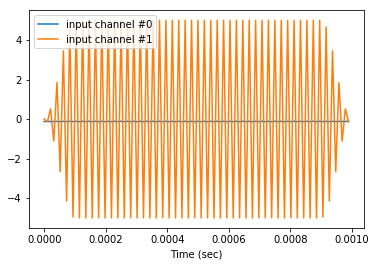

In [5]:
fig, ax = plt.subplots()
for i in range(data.shape[0]):
    ax.plot(timegrid[0, :], data[i, :], 
            label='input channel #{}'.format(i))
ax.set_xlabel('Time (sec)')
ax.legend()